In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import glob

ModuleNotFoundError: No module named 'pandas'

In [ ]:
# path to raw data
data_folder = os.path.join("..", "..", "data","raw")
csv_files = glob.glob(os.path.join(data_folder, "*.csv"))
print("CSV files:", csv_files)

CSV files: ['..\\..\\data\\raw\\fundamentals.csv', '..\\..\\data\\raw\\prices-split-adjusted.csv', '..\\..\\data\\raw\\prices.csv', '..\\..\\data\\raw\\securities.csv']


In [ ]:
file_path = csv_files[1]
df = pd.read_csv(file_path)

In [ ]:
print(df.head())


         date symbol        open       close         low        high  \
0  2016-01-05   WLTW  123.430000  125.839996  122.309998  126.250000   
1  2016-01-06   WLTW  125.239998  119.980003  119.940002  125.540001   
2  2016-01-07   WLTW  116.379997  114.949997  114.930000  119.739998   
3  2016-01-08   WLTW  115.480003  116.620003  113.500000  117.440002   
4  2016-01-11   WLTW  117.010002  114.970001  114.089996  117.330002   

      volume  
0  2163600.0  
1  2386400.0  
2  2489500.0  
3  2006300.0  
4  1408600.0  


In [ ]:
print(df.columns)

Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')


In [ ]:
num_symbols = df['symbol'].nunique()
print("Number of unique symbols:", num_symbols)

Number of unique symbols: 501


In [ ]:
unique_symbols = df['symbol'].unique()
print("Unique symbols:", unique_symbols)

Unique symbols: ['WLTW' 'A' 'AAL' 'AAP' 'AAPL' 'ABC' 'ABT' 'ACN' 'ADBE' 'ADI' 'ADM' 'ADP'
 'ADS' 'ADSK' 'AEE' 'AEP' 'AES' 'AET' 'AFL' 'AGN' 'AIG' 'AIZ' 'AJG' 'AKAM'
 'ALB' 'ALK' 'ALL' 'ALXN' 'AMAT' 'AME' 'AMG' 'AMGN' 'AMP' 'AMT' 'AMZN'
 'AN' 'ANTM' 'AON' 'APA' 'APC' 'APD' 'APH' 'ARNC' 'ATVI' 'AVB' 'AVGO'
 'AVY' 'AWK' 'AXP' 'AYI' 'AZO' 'BA' 'BAC' 'BAX' 'BBBY' 'BBT' 'BBY' 'BCR'
 'BDX' 'BEN' 'BHI' 'BIIB' 'BK' 'BLK' 'BLL' 'BMY' 'BSX' 'BWA' 'BXP' 'C'
 'CA' 'CAG' 'CAH' 'CAT' 'CB' 'CBG' 'CBS' 'CCI' 'CCL' 'CELG' 'CERN' 'CF'
 'CHD' 'CHK' 'CHRW' 'CI' 'CINF' 'CL' 'CLX' 'CMA' 'CMCSA' 'CME' 'CMG' 'CMI'
 'CMS' 'CNC' 'CNP' 'COF' 'COG' 'COH' 'COL' 'COO' 'COP' 'COST' 'CPB' 'CRM'
 'CSCO' 'CSX' 'CTAS' 'CTL' 'CTSH' 'CTXS' 'CVS' 'CVX' 'CXO' 'D' 'DAL' 'DD'
 'DE' 'DFS' 'DG' 'DGX' 'DHI' 'DHR' 'DIS' 'DISCA' 'DISCK' 'DLR' 'DLTR'
 'DNB' 'DOV' 'DOW' 'DPS' 'DRI' 'DTE' 'DUK' 'DVA' 'DVN' 'EA' 'EBAY' 'ECL'
 'ED' 'EFX' 'EIX' 'EL' 'EMN' 'EMR' 'ENDP' 'EOG' 'EQIX' 'EQR' 'EQT' 'ES'
 'ESRX' 'ESS' 'ETFC' 'ETN' 'ETR' 'EW' 'E

In [ ]:
symbol = "AMZN"  # example
df_symbol = df[df['symbol'] == symbol].copy()

In [ ]:
# number of unique dates
num_dates = df_symbol['date'].nunique()
print(f"Number of unique dates for {symbol}: {num_dates}")

Number of unique dates for AMZN: 1762


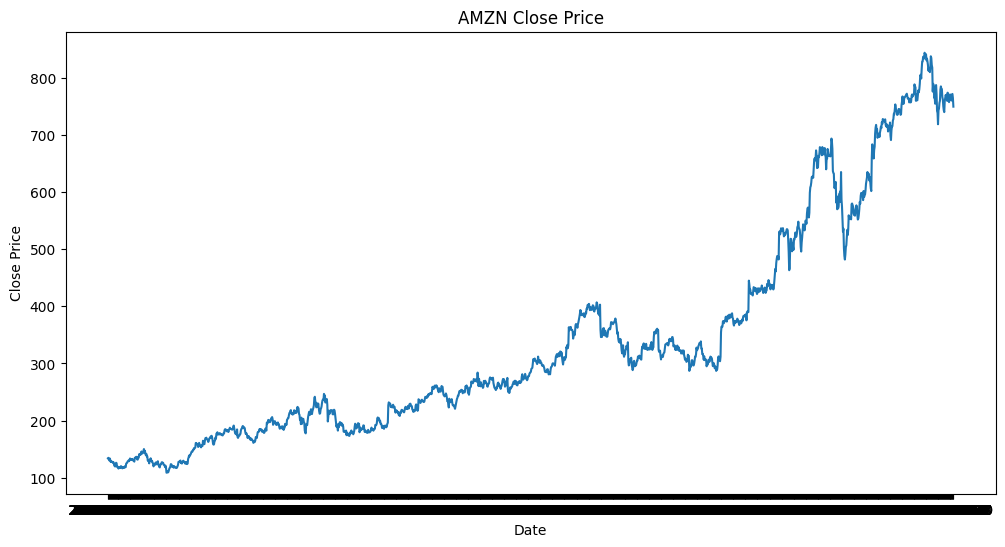

In [ ]:
# plot close price
plt.figure(figsize=(12,6))
plt.plot(df_symbol['date'], df_symbol['close'])
plt.title(f"{symbol} Close Price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

In [ ]:
unique_dates = df_symbol['date'].sort_values().unique()
print(f"First few dates for {symbol}:", unique_dates[:5])
print(f"Last few dates for {symbol}:", unique_dates[-5:])

First few dates for AMZN: ['2010-01-04' '2010-01-05' '2010-01-06' '2010-01-07' '2010-01-08']
Last few dates for AMZN: ['2016-12-23' '2016-12-27' '2016-12-28' '2016-12-29' '2016-12-30']


In [ ]:
# to ensure 'date' is datetime
df_symbol['date'] = pd.to_datetime(df_symbol['date'])

In [ ]:
# full date range (business days)
full_dates = pd.date_range(start=df_symbol['date'].min(),
                           end=df_symbol['date'].max(),
                           freq='B')  # B = business day

In [ ]:
# find missing dates
existing_dates = df_symbol['date'].sort_values().unique()
missing_dates = full_dates.difference(existing_dates)

In [ ]:
print(f"Number of missing dates for {symbol}: {len(missing_dates)}")
print("First few missing dates:", missing_dates[:10])

Number of missing dates for AMZN: 63
First few missing dates: DatetimeIndex(['2010-01-18', '2010-02-15', '2010-04-02', '2010-05-31',
               '2010-07-05', '2010-09-06', '2010-11-25', '2010-12-24',
               '2011-01-17', '2011-02-21'],
              dtype='datetime64[ns]', freq=None)


In [ ]:
# set 'date' as index
df_symbol.set_index('date', inplace=True)

In [ ]:
# reindex to include all business days
df_symbol = df_symbol.reindex(full_dates)

In [ ]:
# forward-fill OHLC prices
for col in ['open', 'high', 'low', 'close']:
    df_symbol[col] = df_symbol[col].ffill()

In [ ]:
# fill volume as 0 for missing trading days
df_symbol['volume'] = df_symbol['volume'].fillna(0)

In [ ]:
print(df_symbol.head(20))

           symbol        open       close         low        high      volume
2010-01-04   AMZN  136.250000  133.899994  133.139999  136.610001   7599900.0
2010-01-05   AMZN  133.429993  134.690002  131.809998  135.479996   8851900.0
2010-01-06   AMZN  134.600006  132.250000  131.649994  134.729996   7178800.0
2010-01-07   AMZN  132.009995  130.000000  128.800003  132.320007  11030200.0
2010-01-08   AMZN  130.559998  133.520004  129.029999  133.679993   9830500.0
2010-01-11   AMZN  132.619995  130.309998  129.210007  132.800003   8779400.0
2010-01-12   AMZN  128.990005  127.349998  126.550003  129.820007   9096300.0
2010-01-13   AMZN  127.900002  129.110001  125.750000  129.710007  10723200.0
2010-01-14   AMZN  129.139999  127.349998  126.400002  130.380005   9774900.0
2010-01-15   AMZN  129.179993  127.139999  127.059998  129.649994  15376500.0
2010-01-18    NaN  129.179993  127.139999  127.059998  129.649994         0.0
2010-01-19   AMZN  126.309998  127.610001  124.330002  128.00000

In [ ]:
# reset index
df_symbol = df_symbol.reset_index().rename(columns={'index':'date'})

In [ ]:
df_symbol['returns'] = df_symbol['close'].pct_change()*100

In [ ]:
print(df_symbol.head(5))

        date symbol        open       close         low        high  \
0 2010-01-04   AMZN  136.250000  133.899994  133.139999  136.610001   
1 2010-01-05   AMZN  133.429993  134.690002  131.809998  135.479996   
2 2010-01-06   AMZN  134.600006  132.250000  131.649994  134.729996   
3 2010-01-07   AMZN  132.009995  130.000000  128.800003  132.320007   
4 2010-01-08   AMZN  130.559998  133.520004  129.029999  133.679993   

       volume   returns  
0   7599900.0       NaN  
1   8851900.0  0.589999  
2   7178800.0 -1.811569  
3  11030200.0 -1.701323  
4   9830500.0  2.707695  


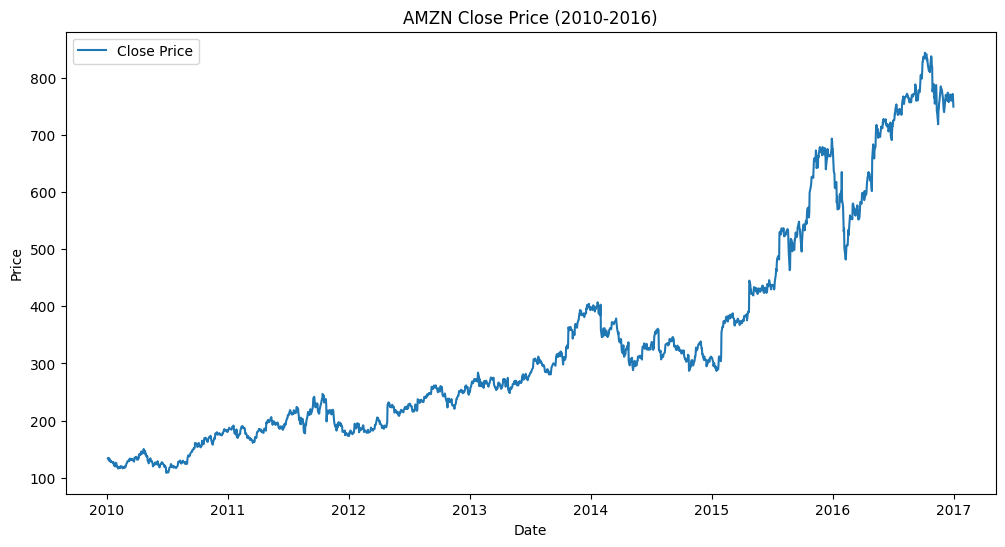

In [ ]:
# Plot close price over time
plt.figure(figsize=(12,6))
plt.plot(df_symbol['date'], df_symbol['close'], label='Close Price')
plt.title('AMZN Close Price (2010-2016)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

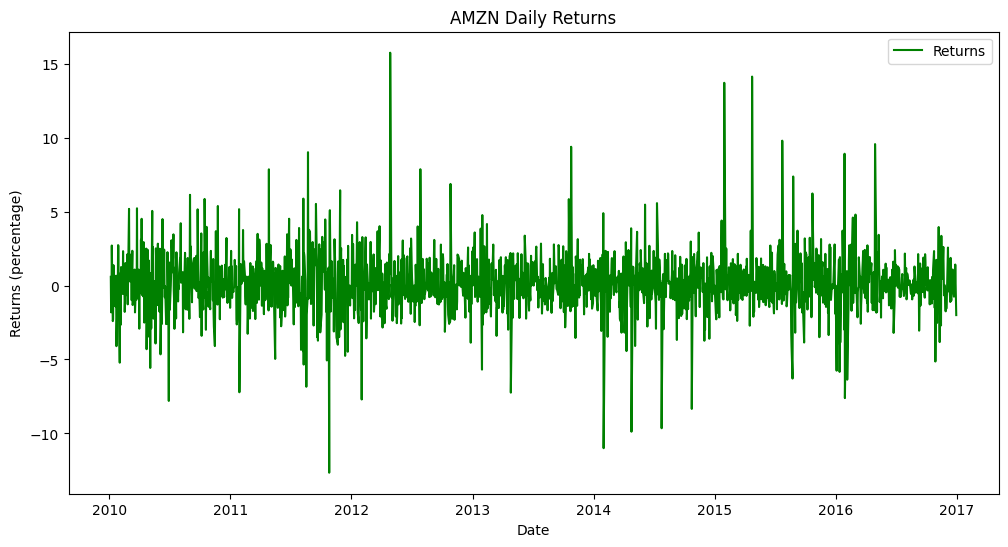

In [ ]:
# Plot retur percentage over time
plt.figure(figsize=(12,6))
plt.plot(df_symbol['date'], df_symbol['returns'], color='green', label='Returns')
plt.title('AMZN Daily Returns')
plt.xlabel('Date')
plt.ylabel('Returns (percentage)')
plt.legend()
plt.show()

In [ ]:
print("Summary statistics for close price:")
print(df_symbol['close'].describe())

Summary statistics for close price:
count    1825.000000
mean      337.721266
std       188.873409
min       108.610001
25%       193.320007
50%       281.760010
75%       398.079987
max       844.359985
Name: close, dtype: float64


In [ ]:
# Lag features
df_symbol['close_lag1'] = df_symbol['close'].shift(1)
df_symbol['close_lag2'] = df_symbol['close'].shift(2)
df_symbol['close_lag3'] = df_symbol['close'].shift(3)

In [ ]:
df_symbol.head(5)

,date,symbol,open,close,low,high,volume,returns,close_lag1,close_lag2,close_lag3
0,2010-01-04,AMZN,136.250000,133.899994,133.139999,136.610001,7599900.0,NaN,NaN,NaN,NaN
1,2010-01-05,AMZN,133.429993,134.690002,131.809998,135.479996,8851900.0,0.589999,133.899994,NaN,NaN
2,2010-01-06,AMZN,134.600006,132.250000,131.649994,134.729996,7178800.0,-1.811569,134.690002,133.899994,NaN
3,2010-01-07,AMZN,132.009995,130.000000,128.800003,132.320007,11030200.0,-1.701323,132.250000,134.690002,133.899994
4,2010-01-08,AMZN,130.559998,133.520004,129.029999,133.679993,9830500.0,2.707695,130.000000,132.250000,134.690002


In [ ]:
# Rolling statistics
df_symbol['MA_5'] = df_symbol['close'].rolling(window=5).mean()
df_symbol['MA_10'] = df_symbol['close'].rolling(window=10).mean()
df_symbol['vol_5'] = df_symbol['returns'].rolling(window=5).std()
df_symbol['vol_10'] = df_symbol['returns'].rolling(window=10).std()

In [ ]:
# Time features
df_symbol['day_of_week'] = df_symbol['date'].dt.dayofweek
df_symbol['month'] = df_symbol['date'].dt.month
df_symbol['quarter'] = df_symbol['date'].dt.quarter

In [ ]:
# Drop initial rows with NaNs (from lags and rolling)
df_symbol = df_symbol.dropna().reset_index(drop=True)

In [ ]:
# Quick check
print(df_symbol.head(10))
print(f"Number of rows after feature engineering: {len(df_symbol)}")

        date symbol        open       close         low        high  \
0 2010-01-19   AMZN  126.309998  127.610001  124.330002  128.000000   
1 2010-01-20   AMZN  127.129997  125.779999  125.080002  129.199997   
2 2010-01-21   AMZN  127.260002  126.620003  125.000000  128.149994   
3 2010-01-22   AMZN  125.599998  121.430000  120.760002  127.669998   
4 2010-01-25   AMZN  122.099998  120.309998  118.120003  122.279999   
5 2010-01-26   AMZN  120.559998  119.480003  119.059998  122.980003   
6 2010-01-27   AMZN  121.029999  122.750000  118.800003  123.330002   
7 2010-01-28   AMZN  124.430000  126.029999  122.800003  127.199997   
8 2010-01-29   AMZN  129.770004  125.410004  124.139999  131.850006   
9 2010-02-01   AMZN  123.180000  118.870003  113.820000  124.860001   

       volume   returns  close_lag1  close_lag2  close_lag3        MA_5  \
0   8892600.0  0.369673  127.139999  127.139999  127.349998  127.670000   
1   9074700.0 -1.434058  127.610001  127.139999  127.139999  127.003

In [ ]:
# split date
split_date = '2016-01-01'

In [ ]:
# Chronological train/test split
train_symbol = df_symbol[df_symbol['date'] < split_date].copy()
test_symbol = df_symbol[df_symbol['date'] >= split_date].copy()

In [ ]:
# Check sizes
print(f"Train rows: {len(train_symbol)}, Test rows: {len(test_symbol)}")

Train rows: 1500, Test rows: 252


In [ ]:
print("Train head:")
print(train_symbol.head())

Train head:
        date symbol        open       close         low        high  \
0 2010-01-19   AMZN  126.309998  127.610001  124.330002  128.000000   
1 2010-01-20   AMZN  127.129997  125.779999  125.080002  129.199997   
2 2010-01-21   AMZN  127.260002  126.620003  125.000000  128.149994   
3 2010-01-22   AMZN  125.599998  121.430000  120.760002  127.669998   
4 2010-01-25   AMZN  122.099998  120.309998  118.120003  122.279999   

       volume   returns  close_lag1  close_lag2  close_lag3        MA_5  \
0   8892600.0  0.369673  127.139999  127.139999  127.349998  127.670000   
1   9074700.0 -1.434058  127.610001  127.139999  127.139999  127.003999   
2   9970600.0  0.667836  125.779999  127.610001  127.139999  126.858000   
3  11568900.0 -4.098881  126.620003  125.779999  127.610001  125.716000   
4  12023900.0 -0.922344  121.430000  126.620003  125.779999  124.350000   

     MA_10     vol_5    vol_10  day_of_week  month  quarter  
0  129.178  0.990214  1.687067            1     

In [ ]:
print("\nTest head:")
print(test_symbol.head())


Test head:
           date symbol        open       close         low        high  \
1500 2016-01-04   AMZN  656.289978  636.989990  627.510010  657.719971   
1501 2016-01-05   AMZN  646.859985  633.789978  627.650024  646.909973   
1502 2016-01-06   AMZN  622.000000  632.650024  620.309998  639.789978   
1503 2016-01-07   AMZN  621.799988  607.940002  605.210022  630.000000   
1504 2016-01-08   AMZN  619.659973  607.049988  606.000000  624.140015   

         volume   returns  close_lag1  close_lag2  close_lag3        MA_5  \
1500  9314500.0 -5.755378  675.890015  675.890015  689.070007  674.362000   
1501  5822600.0 -0.502365  636.989990  675.890015  675.890015  662.326001   
1502  5329200.0 -0.179863  633.789978  636.989990  675.890015  651.042004   
1503  7074900.0 -3.905796  632.650024  633.789978  636.989990  637.452002   
1504  5512900.0 -0.146398  607.940002  632.650024  633.789978  623.683996   

           MA_10     vol_5    vol_10  day_of_week  month  quarter  
1500  669.94

In [ ]:
target_col = 'returns'

In [ ]:
# feature columns
feature_cols = [
    'close_lag1', 'close_lag2', 'close_lag3',
    'MA_5', 'MA_10', 'vol_5', 'vol_10',
    'day_of_week', 'month', 'quarter'
]

In [ ]:
X_train = train_symbol[feature_cols]
y_train = train_symbol[target_col]

In [ ]:
X_test = test_symbol[feature_cols]
y_test = test_symbol[target_col]

In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1500, 10)
y_train shape: (1500,)
X_test shape: (252, 10)
y_test shape: (252,)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

**Naive Forecast (yesterday's return)**

In [ ]:
# Naive forecast: predict today's return = yesterday's return
y_pred_naive = y_test.shift(1).fillna(0)  # shift target column by 1

In [ ]:
mae_naive = mean_absolute_error(y_test, y_pred_naive)
rmse_naive = np.sqrt(mean_squared_error(y_test, y_pred_naive))
print(f"Naive Forecast - MAE: {mae_naive:.4f}%, RMSE: {rmse_naive:.4f}%")

Naive Forecast - MAE: 1.8301%, RMSE: 2.6788%


**ARIMA on returns**

- *p=5, Number of autoregressive (AR) terms. The model uses the previous 5 time steps to predict the next value.*
- *d=0, Degree of differencing (how many times we subtract previous values to make the series stationary)*
- *q=0, Number of moving average (MA) terms (past forecast errors included). Here, 0 means none.*

In [ ]:
arima_model = ARIMA(y_train, order=(5,0,0))
arima_fit = arima_model.fit()
arima_forecast = arima_fit.forecast(steps=len(y_test))

In [ ]:
mae_arima = mean_absolute_error(y_test, arima_forecast)
rmse_arima = np.sqrt(mean_squared_error(y_test, arima_forecast))
print(f"ARIMA Forecast - MAE: {mae_arima:.4f}%, RMSE: {rmse_arima:.4f}%")

ARIMA Forecast - MAE: 1.2434%, RMSE: 1.8689%


In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(y_train)
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -28.535572825134214
p-value: 0.0


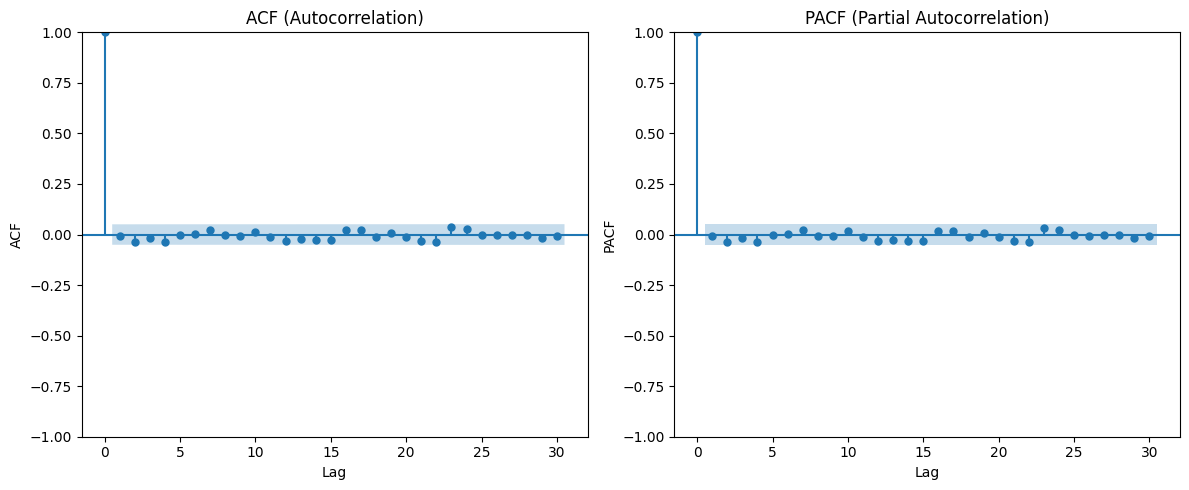

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# maximum number of lags to display
max_lags = 30

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plot_acf(y_train, lags=max_lags, ax=plt.gca())
plt.title('ACF (Autocorrelation)')
plt.xlabel('Lag')
plt.ylabel('ACF')

plt.subplot(1,2,2)
plot_pacf(y_train, lags=max_lags, ax=plt.gca())
plt.title('PACF (Partial Autocorrelation)')
plt.xlabel('Lag')
plt.ylabel('PACF')

plt.tight_layout()
plt.show()


In [ ]:
# import warnings
import itertools
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# warnings.filterwarnings("ignore")

# Define range for p and q
p_range = range(0, 6)  # try p from 0 to 5
q_range = range(0, 6)  # try q from 0 to 5
d = 0  # your series is stationary

best_aic = np.inf
best_order = None
best_model = None

# Grid search
for p, q in itertools.product(p_range, q_range):
    try:
        model = ARIMA(y_train, order=(p, d, q))
        model_fit = model.fit()
        aic = model_fit.aic
        if aic < best_aic:
            best_aic = aic
            best_order = (p, d, q)
            best_model = model_fit
    except:
        continue

print(f"Best ARIMA order: {best_order} with AIC={best_aic}")

# Forecast using the best model
arima_forecast = best_model.forecast(steps=len(y_test))



c:\Users\kakai\Documents\Work\ML\DSI\ML-Team-Project\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\kakai\Documents\Work\ML\DSI\ML-Team-Project\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\kakai\Documents\Work\ML\DSI\ML-Team-Project\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\kakai\Documents\Work\ML\DSI\ML-Team-Project\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum 

Best ARIMA order: (1, 0, 1) with AIC=6439.393777146075


c:\Users\kakai\Documents\Work\ML\DSI\ML-Team-Project\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


- **Random Forest on lag features**

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [ ]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Random Forest - MAE: {mae_rf:.4f}%, RMSE: {rmse_rf:.4f}%")

Random Forest - MAE: 1.3302%, RMSE: 1.9733%


- **Linear Regression model**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

In [ ]:
mae_lr  = mean_absolute_error(y_test, lr_pred)
rmse_lr = np.sqrt(mean_squared_error(y_test, lr_pred))

In [ ]:
print(f"Linear Regression → MAE: {mae_lr:.4f}, RMSE: {rmse_lr:.4f}")

Linear Regression → MAE: 1.3206, RMSE: 1.8630


- **XGBoost**

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb = XGBRegressor(
    n_estimators=600,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)

In [ ]:
xgb.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [ ]:
xgb_pred = xgb.predict(X_test)

In [ ]:
mae_xgb  = mean_absolute_error(y_test, xgb_pred)
rmse_xgb = np.sqrt(mean_squared_error(y_test, xgb_pred))

In [ ]:
print(f"XGBoost → MAE: {mae_xgb:.4f}, RMSE: {rmse_xgb:.4f}")

XGBoost → MAE: 1.5471, RMSE: 2.2028


- **LSTM on returns**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Scale returns for LSTM
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(y_train.values.reshape(-1,1))
test_scaled = scaler.transform(y_test.values.reshape(-1,1))

In [ ]:
# Create sequences
def create_sequences(data, seq_length=20):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

In [ ]:
seq_length = 20
X_train_seq, y_train_seq = create_sequences(train_scaled, seq_length)
X_test_seq, y_test_seq = create_sequences(test_scaled, seq_length)

In [ ]:
# Reshape for LSTM [samples, timesteps, features]
X_train_seq = X_train_seq.reshape((X_train_seq.shape[0], X_train_seq.shape[1], 1))
X_test_seq = X_test_seq.reshape((X_test_seq.shape[0], X_test_seq.shape[1], 1))

In [ ]:
# LSTM model
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train_seq, y_train_seq, epochs=20, batch_size=32, verbose=0)

c:\Users\kakai\Documents\Work\ML\DSI\ML-Team-Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Predict and inverse scale
y_pred_lstm = lstm_model.predict(X_test_seq)
y_pred_lstm_rescaled = scaler.inverse_transform(y_pred_lstm)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [ ]:
# Align y_test for sequence
y_test_actual = y_test.values[seq_length:]
mae_lstm = mean_absolute_error(y_test_actual, y_pred_lstm_rescaled)
rmse_lstm = np.sqrt(mean_squared_error(y_test_actual, y_pred_lstm_rescaled))
print(f"LSTM - MAE: {mae_lstm:.4f}%, RMSE: {rmse_lstm:.4f}%")

LSTM - MAE: 1.1806%, RMSE: 1.6479%


**LSTM Grid Search**

In [ ]:
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(y_train.values.reshape(-1,1))
test_scaled = scaler.transform(y_test.values.reshape(-1,1))

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)


- grid search parameters

In [ ]:
param_grid = {
    "seq_length": [3, 5, 10],
    "lstm_units": [32, 50, 64],
    "batch_size": [16, 32, 64],
    "epochs": [10, 20]
}

best_score = np.inf
best_params = None

- Grid search loop

In [ ]:
for seq_length in param_grid["seq_length"]:
    # recreate sequences for each seq_length
    X_train_seq, y_train_seq = create_sequences(train_scaled, seq_length)
    X_test_seq, y_test_seq = create_sequences(test_scaled, seq_length)

    # reshape for LSTM
    X_train_seq = X_train_seq.reshape((X_train_seq.shape[0], seq_length, 1))
    X_test_seq = X_test_seq.reshape((X_test_seq.shape[0], seq_length, 1))

    for lstm_units in param_grid["lstm_units"]:
        for batch_size in param_grid["batch_size"]:
            for epochs in param_grid["epochs"]:

                # ---------------------------------------
                # BUILD LSTM MODEL
                # ---------------------------------------
                model = Sequential([
                    LSTM(lstm_units, activation="relu", input_shape=(seq_length, 1)),
                    Dense(1)
                ])
                model.compile(optimizer="adam", loss="mse")

                # TRAIN
                model.fit(
                    X_train_seq, y_train_seq,
                    epochs=epochs,
                    batch_size=batch_size,
                    verbose=0
                )

                # PREDICT
                y_pred = model.predict(X_test_seq, verbose=0)
                y_pred_rescaled = scaler.inverse_transform(y_pred)

                # Align y_test
                y_test_actual = y_test.values[seq_length:]

                # METRICS
                mae = mean_absolute_error(y_test_actual, y_pred_rescaled)
                rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_rescaled))

                print(f"Params: seq={seq_length}, units={lstm_units}, "
                      f"batch={batch_size}, epochs={epochs} => MAE={mae:.4f}, RMSE={rmse:.4f}")

                # Track best
                if rmse < best_score:
                    best_score = rmse
                    best_params = {
                        "seq_length": seq_length,
                        "lstm_units": lstm_units,
                        "batch_size": batch_size,
                        "epochs": epochs
                    }

Params: seq=3, units=32, batch=16, epochs=10 => MAE=1.2347, RMSE=1.8490


c:\Users\kakai\Documents\Work\ML\DSI\ML-Team-Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Params: seq=3, units=32, batch=16, epochs=20 => MAE=1.2526, RMSE=1.8618


c:\Users\kakai\Documents\Work\ML\DSI\ML-Team-Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Params: seq=3, units=32, batch=32, epochs=10 => MAE=1.2658, RMSE=1.8825


c:\Users\kakai\Documents\Work\ML\DSI\ML-Team-Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Params: seq=3, units=32, batch=32, epochs=20 => MAE=1.2426, RMSE=1.8507


c:\Users\kakai\Documents\Work\ML\DSI\ML-Team-Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Params: seq=3, units=32, batch=64, epochs=10 => MAE=1.2586, RMSE=1.8762


c:\Users\kakai\Documents\Work\ML\DSI\ML-Team-Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Params: seq=3, units=32, batch=64, epochs=20 => MAE=1.2461, RMSE=1.8590


c:\Users\kakai\Documents\Work\ML\DSI\ML-Team-Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Params: seq=3, units=50, batch=16, epochs=10 => MAE=1.3804, RMSE=1.9564


c:\Users\kakai\Documents\Work\ML\DSI\ML-Team-Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Params: seq=3, units=50, batch=16, epochs=20 => MAE=1.2819, RMSE=1.8789


c:\Users\kakai\Documents\Work\ML\DSI\ML-Team-Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Params: seq=3, units=50, batch=32, epochs=10 => MAE=1.2456, RMSE=1.8573


c:\Users\kakai\Documents\Work\ML\DSI\ML-Team-Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Params: seq=3, units=50, batch=32, epochs=20 => MAE=1.2529, RMSE=1.8642


c:\Users\kakai\Documents\Work\ML\DSI\ML-Team-Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Params: seq=3, units=50, batch=64, epochs=10 => MAE=1.2547, RMSE=1.8639


c:\Users\kakai\Documents\Work\ML\DSI\ML-Team-Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Params: seq=3, units=50, batch=64, epochs=20 => MAE=1.2649, RMSE=1.8683


c:\Users\kakai\Documents\Work\ML\DSI\ML-Team-Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Params: seq=3, units=64, batch=16, epochs=10 => MAE=1.2863, RMSE=1.8839


c:\Users\kakai\Documents\Work\ML\DSI\ML-Team-Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Params: seq=3, units=64, batch=16, epochs=20 => MAE=1.2298, RMSE=1.8443


c:\Users\kakai\Documents\Work\ML\DSI\ML-Team-Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Params: seq=3, units=64, batch=32, epochs=10 => MAE=1.3028, RMSE=1.8956


c:\Users\kakai\Documents\Work\ML\DSI\ML-Team-Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Params: seq=3, units=64, batch=32, epochs=20 => MAE=1.2288, RMSE=1.8390


c:\Users\kakai\Documents\Work\ML\DSI\ML-Team-Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Params: seq=3, units=64, batch=64, epochs=10 => MAE=1.2717, RMSE=1.8876


c:\Users\kakai\Documents\Work\ML\DSI\ML-Team-Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Params: seq=3, units=64, batch=64, epochs=20 => MAE=1.2572, RMSE=1.8681


c:\Users\kakai\Documents\Work\ML\DSI\ML-Team-Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Params: seq=5, units=32, batch=16, epochs=10 => MAE=1.3085, RMSE=1.9085


c:\Users\kakai\Documents\Work\ML\DSI\ML-Team-Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Params: seq=5, units=32, batch=16, epochs=20 => MAE=1.2387, RMSE=1.8557


c:\Users\kakai\Documents\Work\ML\DSI\ML-Team-Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Params: seq=5, units=32, batch=32, epochs=10 => MAE=1.2923, RMSE=1.8857


c:\Users\kakai\Documents\Work\ML\DSI\ML-Team-Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Params: seq=5, units=32, batch=32, epochs=20 => MAE=1.2696, RMSE=1.8669


c:\Users\kakai\Documents\Work\ML\DSI\ML-Team-Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Params: seq=5, units=32, batch=64, epochs=10 => MAE=1.2540, RMSE=1.8513


c:\Users\kakai\Documents\Work\ML\DSI\ML-Team-Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Params: seq=5, units=32, batch=64, epochs=20 => MAE=1.2887, RMSE=1.8856


c:\Users\kakai\Documents\Work\ML\DSI\ML-Team-Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Params: seq=5, units=50, batch=16, epochs=10 => MAE=1.2410, RMSE=1.8528


c:\Users\kakai\Documents\Work\ML\DSI\ML-Team-Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Params: seq=5, units=50, batch=16, epochs=20 => MAE=1.3468, RMSE=1.9235


c:\Users\kakai\Documents\Work\ML\DSI\ML-Team-Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Params: seq=5, units=50, batch=32, epochs=10 => MAE=1.2558, RMSE=1.8568


c:\Users\kakai\Documents\Work\ML\DSI\ML-Team-Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Params: seq=5, units=50, batch=32, epochs=20 => MAE=1.2478, RMSE=1.8565


c:\Users\kakai\Documents\Work\ML\DSI\ML-Team-Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Params: seq=5, units=50, batch=64, epochs=10 => MAE=1.2630, RMSE=1.8644


c:\Users\kakai\Documents\Work\ML\DSI\ML-Team-Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Params: seq=5, units=50, batch=64, epochs=20 => MAE=1.2422, RMSE=1.8500


c:\Users\kakai\Documents\Work\ML\DSI\ML-Team-Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Params: seq=5, units=64, batch=16, epochs=10 => MAE=1.3852, RMSE=1.9611


c:\Users\kakai\Documents\Work\ML\DSI\ML-Team-Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Params: seq=5, units=64, batch=16, epochs=20 => MAE=1.2374, RMSE=1.8488


c:\Users\kakai\Documents\Work\ML\DSI\ML-Team-Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Params: seq=5, units=64, batch=32, epochs=10 => MAE=1.2552, RMSE=1.8578


c:\Users\kakai\Documents\Work\ML\DSI\ML-Team-Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Params: seq=5, units=64, batch=32, epochs=20 => MAE=1.2436, RMSE=1.8554


c:\Users\kakai\Documents\Work\ML\DSI\ML-Team-Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Params: seq=5, units=64, batch=64, epochs=10 => MAE=1.2807, RMSE=1.8773


c:\Users\kakai\Documents\Work\ML\DSI\ML-Team-Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Params: seq=5, units=64, batch=64, epochs=20 => MAE=1.2654, RMSE=1.8788


c:\Users\kakai\Documents\Work\ML\DSI\ML-Team-Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Params: seq=10, units=32, batch=16, epochs=10 => MAE=1.2687, RMSE=1.8460


c:\Users\kakai\Documents\Work\ML\DSI\ML-Team-Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Params: seq=10, units=32, batch=16, epochs=20 => MAE=1.2430, RMSE=1.8393


c:\Users\kakai\Documents\Work\ML\DSI\ML-Team-Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Params: seq=10, units=32, batch=32, epochs=10 => MAE=1.2606, RMSE=1.8335


c:\Users\kakai\Documents\Work\ML\DSI\ML-Team-Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Params: seq=10, units=32, batch=32, epochs=20 => MAE=1.2446, RMSE=1.8465


c:\Users\kakai\Documents\Work\ML\DSI\ML-Team-Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Params: seq=10, units=32, batch=64, epochs=10 => MAE=1.2589, RMSE=1.8377


c:\Users\kakai\Documents\Work\ML\DSI\ML-Team-Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Params: seq=10, units=32, batch=64, epochs=20 => MAE=1.2517, RMSE=1.8416


c:\Users\kakai\Documents\Work\ML\DSI\ML-Team-Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Params: seq=10, units=50, batch=16, epochs=10 => MAE=1.2824, RMSE=1.8573


c:\Users\kakai\Documents\Work\ML\DSI\ML-Team-Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Params: seq=10, units=50, batch=16, epochs=20 => MAE=1.2877, RMSE=1.8877


c:\Users\kakai\Documents\Work\ML\DSI\ML-Team-Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Params: seq=10, units=50, batch=32, epochs=10 => MAE=1.2745, RMSE=1.8753


c:\Users\kakai\Documents\Work\ML\DSI\ML-Team-Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Params: seq=10, units=50, batch=32, epochs=20 => MAE=1.2923, RMSE=1.8570


c:\Users\kakai\Documents\Work\ML\DSI\ML-Team-Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Params: seq=10, units=50, batch=64, epochs=10 => MAE=1.2245, RMSE=1.8170


c:\Users\kakai\Documents\Work\ML\DSI\ML-Team-Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Params: seq=10, units=50, batch=64, epochs=20 => MAE=1.2430, RMSE=1.8335


c:\Users\kakai\Documents\Work\ML\DSI\ML-Team-Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Params: seq=10, units=64, batch=16, epochs=10 => MAE=1.2350, RMSE=1.8325


c:\Users\kakai\Documents\Work\ML\DSI\ML-Team-Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Params: seq=10, units=64, batch=16, epochs=20 => MAE=1.3522, RMSE=1.9032


c:\Users\kakai\Documents\Work\ML\DSI\ML-Team-Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Params: seq=10, units=64, batch=32, epochs=10 => MAE=1.2481, RMSE=1.8401


c:\Users\kakai\Documents\Work\ML\DSI\ML-Team-Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Params: seq=10, units=64, batch=32, epochs=20 => MAE=1.2698, RMSE=1.8480


c:\Users\kakai\Documents\Work\ML\DSI\ML-Team-Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Params: seq=10, units=64, batch=64, epochs=10 => MAE=1.2727, RMSE=1.8761


c:\Users\kakai\Documents\Work\ML\DSI\ML-Team-Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Params: seq=10, units=64, batch=64, epochs=20 => MAE=1.2425, RMSE=1.8301


In [ ]:
print("Result from grid search:")
print(best_params)
print(f"Best RMSE: {best_score:.4f}")

Result from grid search:
{'seq_length': 10, 'lstm_units': 50, 'batch_size': 64, 'epochs': 10}
Best RMSE: 1.8170
